In [1]:
from pylabcontrol.core import Script
import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def scale_xy(data,dimx,dimy,absolute=True):
    calib_xy = 20/75 #um/V
    nx,ny = np.shape(data)
    x = np.linspace(*dimx,nx)*calib_xy
    y = np.linspace(*dimy,ny)*calib_xy
    if absolute == False:
        x = x - np.min(x)
        y = y - np.min(y)
    X,Y = np.meshgrid(x,y)
    return X,Y

def scale_z(data):
    calib_z = 0.217 # um/V  (20230113 measuring calibration sample)
    z = data*calib_z
    return z    

## plotting nice sphere
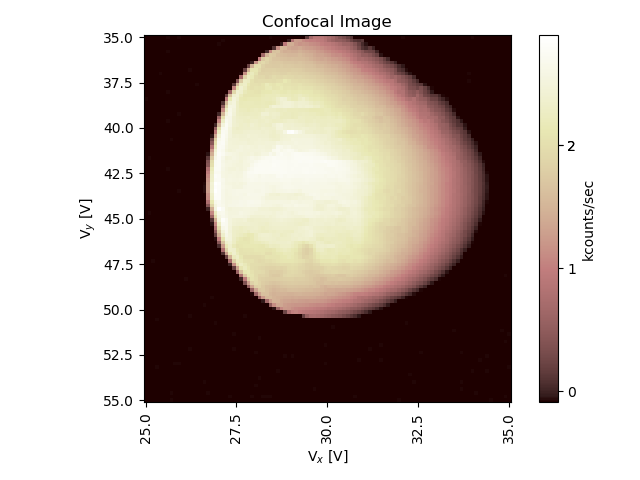

In [3]:
folder = r'C:\Users\Characterization\B26_scanning_probe\data\230113-17_04_18_afmscan'

In [4]:
data = Script.load_data(folder)
image = data['image_data']
extent = data['extent']
dimx = (extent[0],extent[1])
dimy = (extent[3],extent[2])

In [5]:
dimx

(25.0, 45.0)

In [6]:
extent

array([25., 45., 55., 35.])

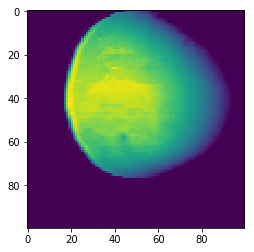

In [7]:
plt.imshow(image)
plt.show()

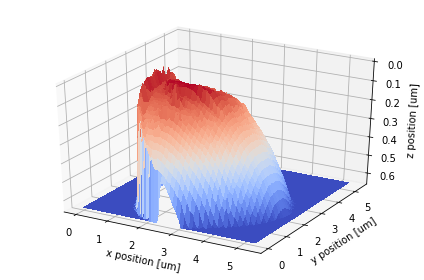

In [8]:
# rescaling axis
# scale data
x,y = scale_xy(image,dimx,dimy,absolute=False)
z = scale_z(image)

# set 0 at max
z = (z.max()-z)

# making a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z,
                #vmin=zlim[0],
                #vmax=zlim[1],
                cmap='coolwarm_r',
                linewidth=0,
                antialiased=False)
# modifing z axis
ax.invert_zaxis()
#ax.set_zlim(reversed(zlim))
xlim,ylim = (None,None)
units = 'um'
title = None

if xlim is not None:
    ax.set_xlim(xlim)
if ylim is not None:
    ax.set_ylim(ylim)
if title is not None:
    plt.title(title)

if units is "um":
    ax.set_xlabel("x position [um]")
    ax.set_ylabel("y position [um]")
    ax.set_zlabel("z position [um]")
    
plt.tight_layout()
plt.savefig('plots/'+folder[-23:]+'.png',dpi=400)

### the sphere seems too big!
- the diameter should be 2um

## plot other one

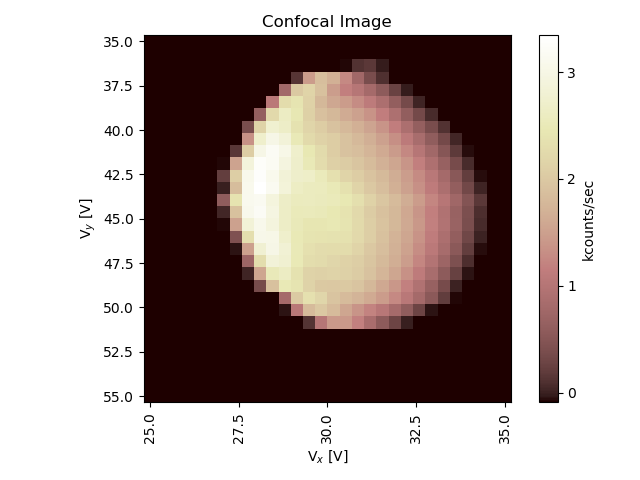

In [9]:
folder = r'C:\Users\Characterization\B26_scanning_probe\data\230113-16_52_20_afmscan'

In [10]:
data = Script.load_data(folder)
image = data['image_data']
extent = data['extent']
dimx = (extent[0],extent[1])
dimy = (extent[3],extent[2])

In [11]:
dimx

(25.0, 45.0)

In [12]:
dimy

(35.0, 55.0)

In [13]:
extent

array([25., 45., 55., 35.])

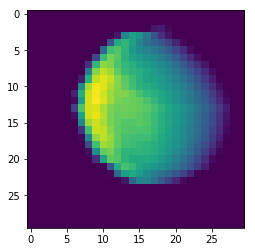

In [14]:
plt.imshow(image)
plt.show()

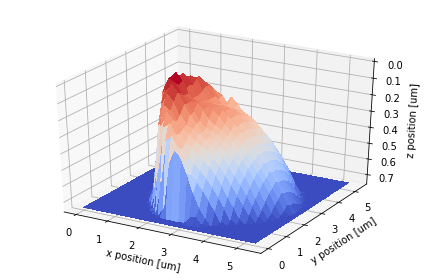

In [15]:
# rescaling axis
# scale data
x,y = scale_xy(image,dimx,dimy,absolute=False)
z = scale_z(image)

# set 0 at max
z = (z.max()-z)

# making a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z,
                #vmin=zlim[0],
                #vmax=zlim[1],
                cmap='coolwarm_r',
                linewidth=0,
                antialiased=False)
# modifing z axis
ax.invert_zaxis()
#ax.set_zlim(reversed(zlim))
xlim,ylim = (None,None)
units = 'um'
title = None

if xlim is not None:
    ax.set_xlim(xlim)
if ylim is not None:
    ax.set_ylim(ylim)
if title is not None:
    plt.title(title)

if units is "um":
    ax.set_xlabel("x position [um]")
    ax.set_ylabel("y position [um]")
    ax.set_zlabel("z position [um]")

plt.tight_layout()
plt.savefig('plots/'+folder[-23:]+'.png',dpi=400)

## plotting another one
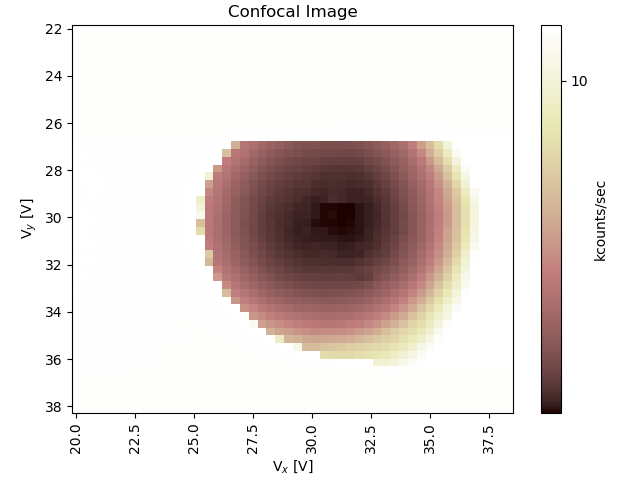

In [16]:
folder = r'C:\Users\Characterization\B26_scanning_probe\data\230110-17_18_18_afmscan'

In [17]:
data = Script.load_data(folder)
image = data['image_data']
extent = data['extent']
dimx = (extent[0],extent[1])
dimy = (extent[3],extent[2])

In [18]:
dimx

(20.0, 38.33469474270544)

In [19]:
dimy

(22.0, 38.10833210168434)

In [20]:
# flip data
image_flipped = np.flip(image,axis=0)

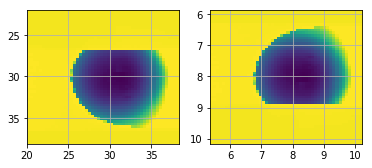

In [21]:
fig, (ax1,ax2) = plt.subplots(1, 2)
ax1.imshow(image,extent=extent)
ax1.grid()
ax2.imshow(image_flipped,extent=extent*20/75)
ax2.grid()
plt.show()

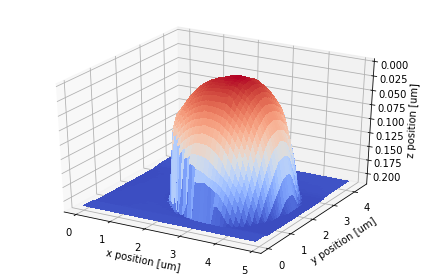

In [22]:
# rescaling axis
# scale data
x,y = scale_xy(image_flipped,dimx,dimy,absolute=False)
z = scale_z(image_flipped)

z = z - z.min()
# making a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z,
                #vmin=zlim[0],
                #vmax=zlim[1],
                cmap='coolwarm_r',
                linewidth=0,
                antialiased=False)

xlim,ylim = (None,None)
zlim = (z.min(),z.max())
units = 'um'
title = None

if xlim is not None:
    ax.set_xlim(xlim)
if ylim is not None:
    ax.set_ylim(ylim)
    
# modifing z axis
ax.invert_zaxis()
    
    
if title is not None:
    plt.title(title)

if units is "um":
    ax.set_xlabel("x position [um]")
    ax.set_ylabel("y position [um]")
    ax.set_zlabel("z position [um]")

plt.tight_layout()
plt.savefig('plots/'+folder[-23:]+'.png',dpi=400)

## imaging with qnami piller
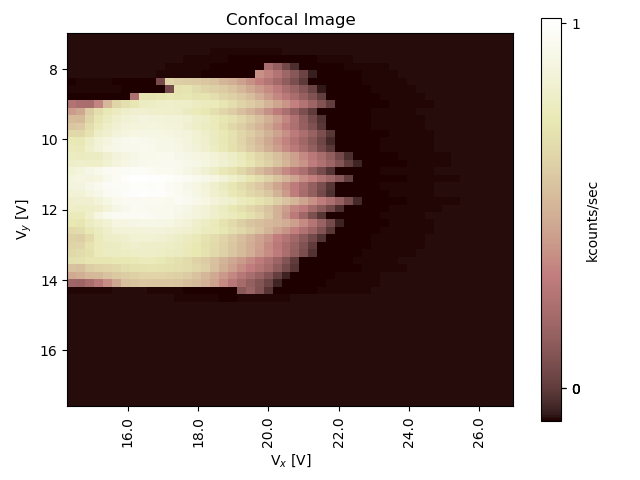

In [31]:
folder = r'C:\Users\Characterization\B26_scanning_probe\data\230127-19_51_34_afmscan'

In [32]:
data = Script.load_data(folder)
image = data['image_data']
extent = data['extent']
dimx = (extent[0],extent[1])
dimy = (extent[3],extent[2])

In [33]:
dimx

(14.409965998520471, 26.84005752370133)

In [34]:
dimy

(7.091872927470296, 17.479877987800013)

In [35]:
# flip data
image_flipped = np.flip(image,axis=0)

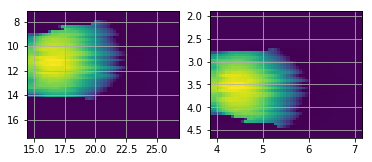

In [36]:
fig, (ax1,ax2) = plt.subplots(1, 2)
ax1.imshow(image,extent=extent)
ax1.grid()
ax2.imshow(image_flipped,extent=extent*20/75)
ax2.grid()
plt.show()

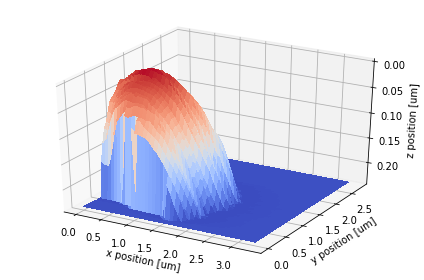

In [42]:
# rescaling axis
# scale data
x,y = scale_xy(image,dimx,dimy,absolute=False)
z = scale_z(image)

z = (z.max()-z)
# making a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z,
                #vmin=zlim[0],
                #vmax=zlim[1],
                cmap='coolwarm_r',
                linewidth=0,
                antialiased=False)

xlim,ylim = (None,None)
zlim = (z.min(),z.max())
units = 'um'
title = None

if xlim is not None:
    ax.set_xlim(xlim)
if ylim is not None:
    ax.set_ylim(ylim)
    
# modifing z axis
ax.invert_zaxis()
    
    
if title is not None:
    plt.title(title)

if units is "um":
    ax.set_xlabel("x position [um]")
    ax.set_ylabel("y position [um]")
    ax.set_zlabel("z position [um]")

plt.tight_layout()
plt.savefig('plots/'+folder[-23:]+'.png',dpi=400)